## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.1.0
blinker                          1.4
bl

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
churn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Week10/BankChurners.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
churn.shape ##  Complete the code to view dimensions of the train data

(10127, 21)

* There are total of 10,127 rows and 21 columns in the dataset

In [ ]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

* There is no duplicate in the dataset

### Checking for missing values

In [ ]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2) ##  Complete the code to check missing entries in the train data

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

* Education_Level column has 15% missing values out of the total observations.
* Marital_Status column has 7.4% missing values out of the total observations.

### Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Complete the code to print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


* Customer Age ranged from age 26 to 73, average age of the customer is 46
* number of dependent is between 1 to 5
* Average length of time the customer has relationship with the bank is around 36 months and the number of product the customers have are on average 4 products
* number of months Customers are inactive with the bank are on average 2.3 months and the customer have contact with the bank on average 2.5 times in the last 12 months
* Credit limit range from 8,631 to 34,516 and the credit balance from 1,163 to 2,517 and the average available credit is 7,469
* Total transaction amount range from 4,404 to 18,484 and the number of total transactions range from 65 to 139 in the last 12 months
* ration of the total transaction count in 4th quarter range to 1st quarter on average is 0.71 and ratio of total transaction amount is on avaerage 0.76
* The availble credit the customer spent on average is 0.275

In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
# added by Sarah : Create a copy of data to perform detailed EDA in the appendix section.
df = data.copy()

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

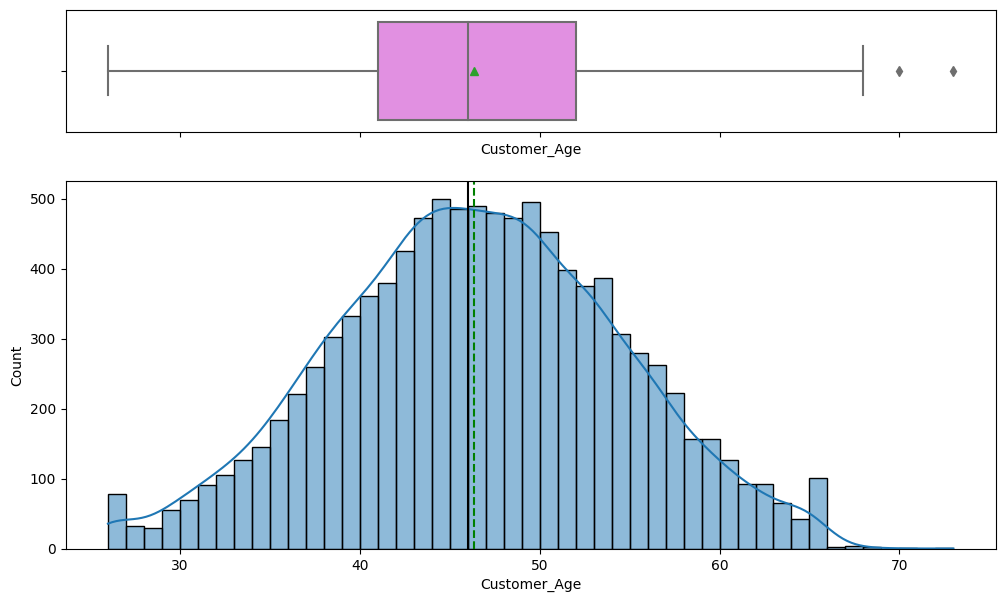

In [ ]:
histogram_boxplot(df, "Customer_Age", kde=True)

* Age has symmetrical and normal distribution, the number of customers who have accounts above the median age of 46 are slightly higher than those customers who are aged below 46

`Months_on_book`

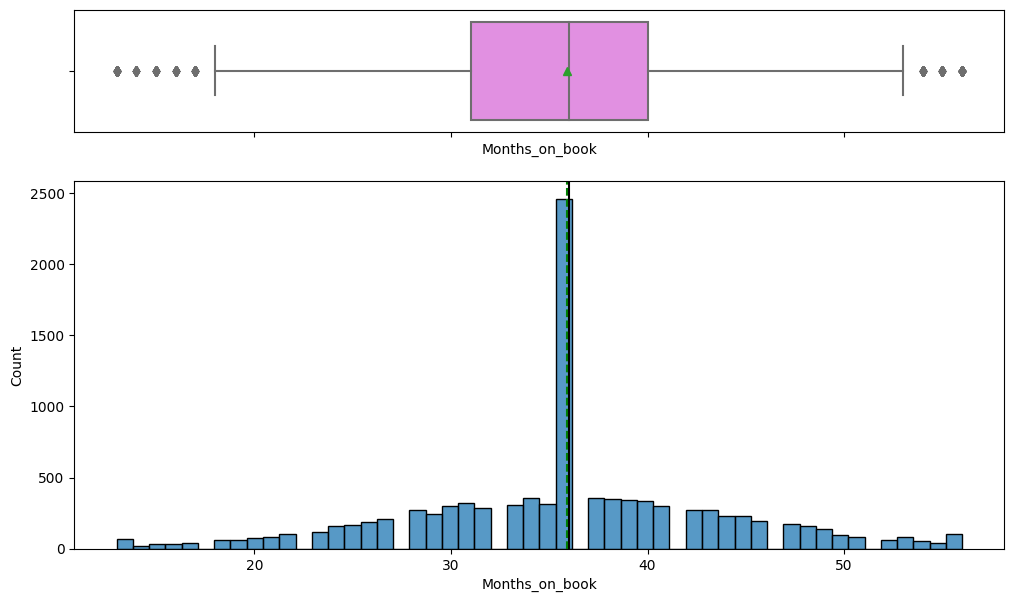

In [ ]:
histogram_boxplot(df, "Months_on_book")  ## Complete the code to create histogram_boxplot for 'New_Price'

* The Period of relationship customers with the bank have a very wide range from 13 months to 56 months with the majority of the customer relationship average at 36 months
* There are many outliers that are less than 13 months and more than 56 months

`Credit_Limit`

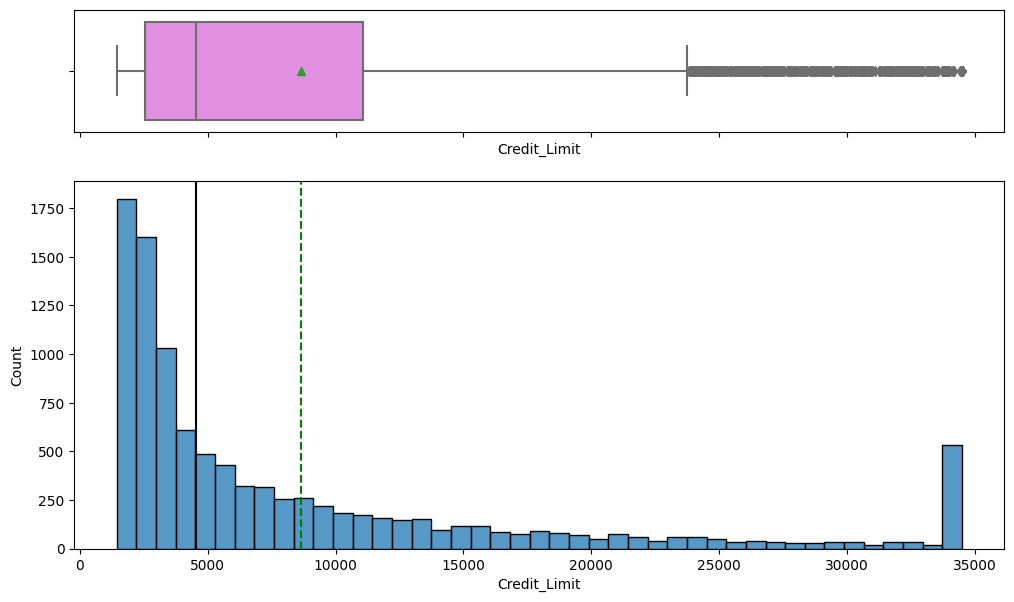

In [ ]:
histogram_boxplot(df, "Credit_Limit")  ## Complete the code to create histogram_boxplot for 'New_Price'

* Distribution of Credit limit is right-skewed with many outliers.
* From the boxplot, we can see many customers with credit limit that are more than ~11000 dollars that are consider outliers.

`Total_Revolving_Bal`

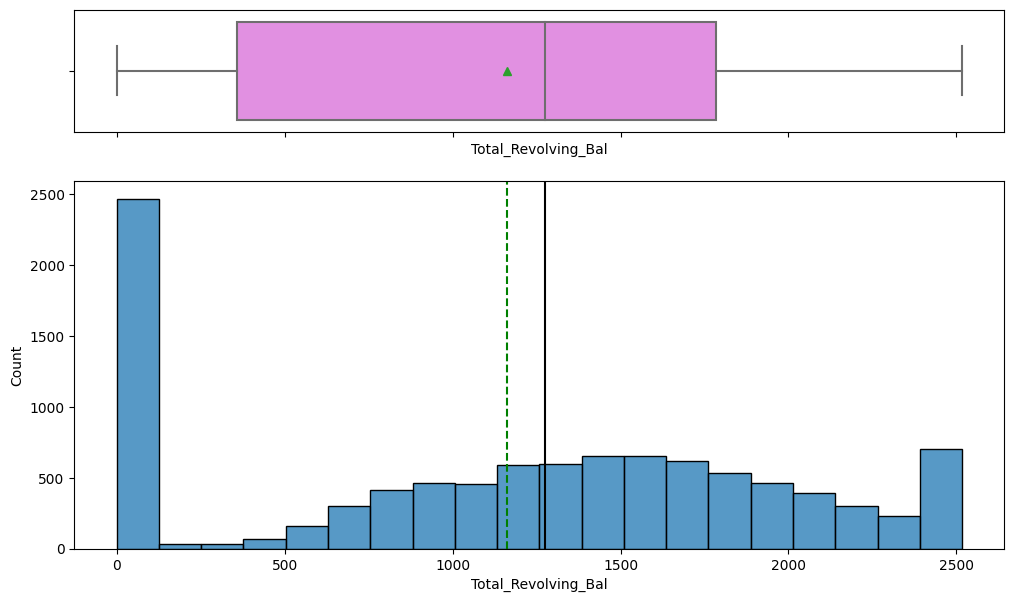

In [ ]:
histogram_boxplot(df, "Total_Revolving_Bal")  ## Complete the code to create histogram_boxplot for 'New_Price'

* The distribution of the total revolving balance is slightly skewed towards the right due to high number of the customer account 2,470 have zero balance.
* The average revoloving balance is around ~1160 dollors

`Avg_Open_To_Buy`

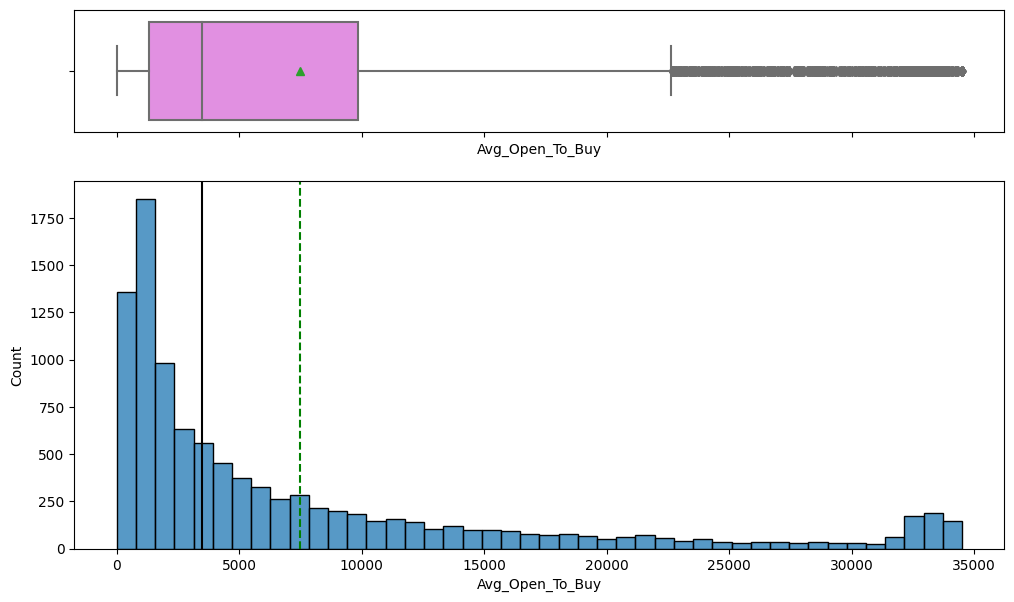

In [ ]:
histogram_boxplot(df, "Avg_Open_To_Buy")  ## Complete the code to create histogram_boxplot for 'New_Price'

* This variable respresent the amount left on customer's credit card to use. and this column represents the average of this value for the last 12 months.
* It has almost identical distribution as the variable "Credit Limit" with many outliers for the accounts that have ~9900 dollor left on their card
* this pattern is consistent and seems to tell us customers will spend whatever they are allow to spend within the credit limit on the credit card


In [ ]:
df[df["Avg_Open_To_Buy"] > 9859]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
6,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10113,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,2,3,2,13303.000,2517,10786.000,0.929,10219,85,0.809,0.189
10116,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.000,2241,10946.000,0.689,15354,112,0.931,0.170
10117,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106
10119,Attrited Customer,55,F,3,Uneducated,Single,abc,Blue,47,4,3,3,14657.000,2517,12140.000,0.166,6009,53,0.514,0.172


`Total_Trans_Ct`

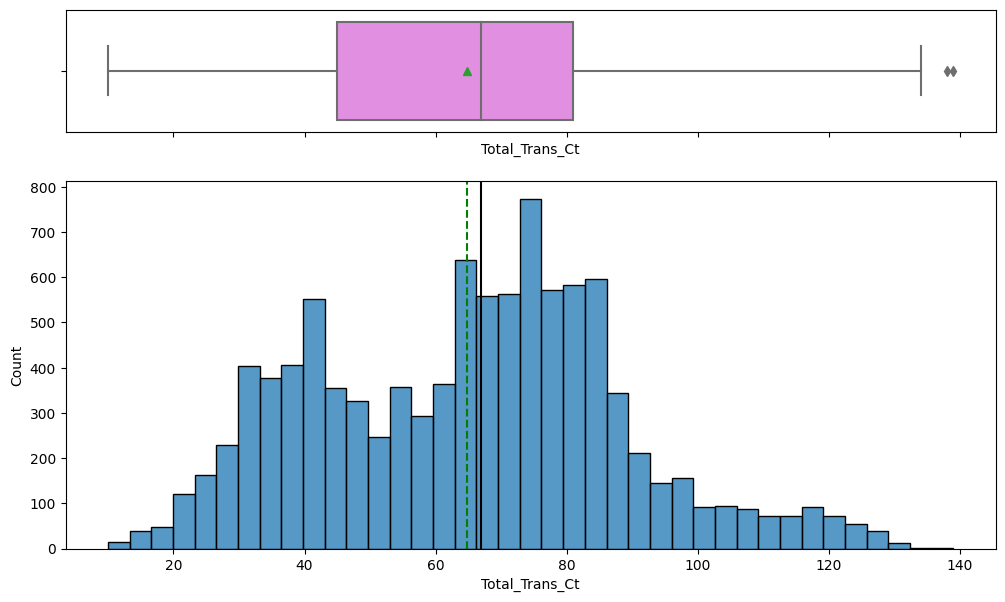

In [ ]:
histogram_boxplot(df, "Total_Trans_Ct")  ## Complete the code to create histogram_boxplot for 'New_Price'

* The distribution of the Total_Trans_Ct variable is slightly left skewed with an average of 65 total transaction per customer over the last 12 months
* There are a few outliers of around 130 counts that might need further investigation

In [ ]:
df[df["Total_Trans_Ct"] > 130]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9213,Existing Customer,32,M,1,Uneducated,Single,$60K - $80K,Silver,36,2,3,1,33711.000,1437,32274.000,0.942,14880,134,0.654,0.043
9261,Existing Customer,46,F,4,NaN,Single,Less than $40K,Blue,36,2,1,2,3973.000,0,3973.000,0.890,13740,131,0.819,0.000
9269,Existing Customer,35,M,3,High School,Married,$40K - $60K,Blue,27,1,2,3,14382.000,1950,12432.000,0.578,12941,131,0.819,0.136
9324,Existing Customer,41,M,3,NaN,Married,$120K +,Blue,33,2,4,3,34516.000,638,33878.000,0.724,13085,139,0.675,0.018
9339,Existing Customer,27,F,0,Graduate,NaN,Less than $40K,Blue,36,1,1,2,4548.000,1450,3098.000,0.844,14330,131,0.638,0.319
9586,Existing Customer,56,F,1,High School,Married,abc,Blue,49,1,2,1,17542.000,2517,15025.000,0.800,13939,138,0.792,0.143
9629,Existing Customer,42,M,2,Graduate,Single,$60K - $80K,Silver,36,3,3,2,34516.000,0,34516.000,0.774,12920,132,0.737,0.000
9728,Existing Customer,46,M,2,Graduate,Single,$120K +,Blue,28,1,1,1,7790.000,1921,5869.000,0.789,14567,131,0.617,0.247
9841,Existing Customer,50,M,3,Graduate,Married,$120K +,Blue,41,4,2,3,34516.000,2253,32263.000,1.032,16692,131,0.795,0.065
10085,Existing Customer,49,M,3,Uneducated,Married,$120K +,Gold,38,4,3,4,14938.000,0,14938.000,0.737,15277,131,0.724,0.000


* All such records with a total transaction count of more than 130 belongs to existing customers have they all have contact with the bank at least once in the last 12 months, hence they seem to represent true pattern and we don't need to treat them as outliers.

`Total_Amt_Chng_Q4_Q1`

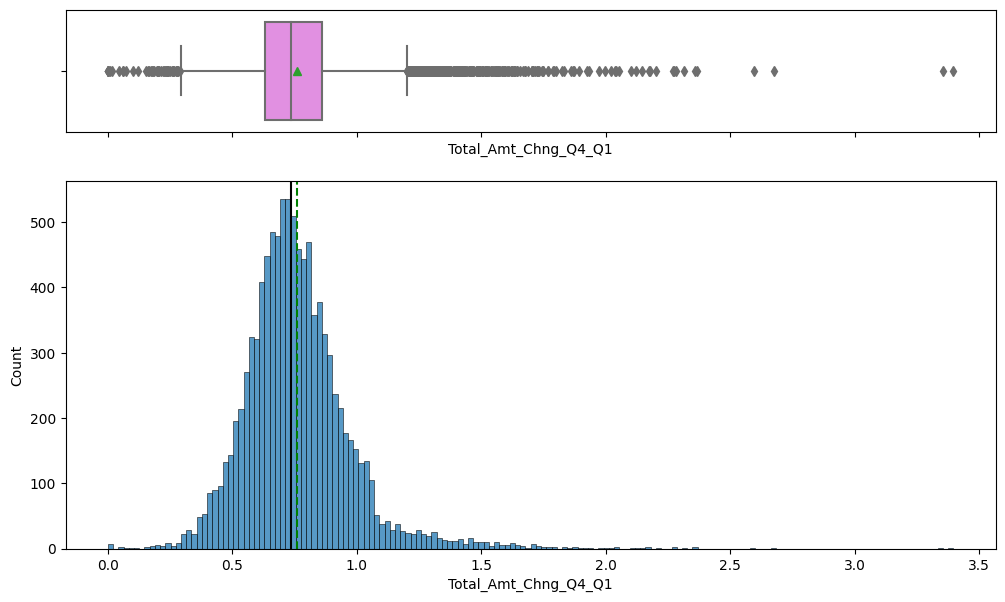

In [ ]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")  ## Complete the code to create histogram_boxplot for 'New_Price'

* The distribution of the Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter is very evenly distributed, howver, there's large amount of outliers with ration that are greater than 1.3 and smaller than 0.2.


**Let's see total transaction amount distributed**

`Total_Trans_Amt`

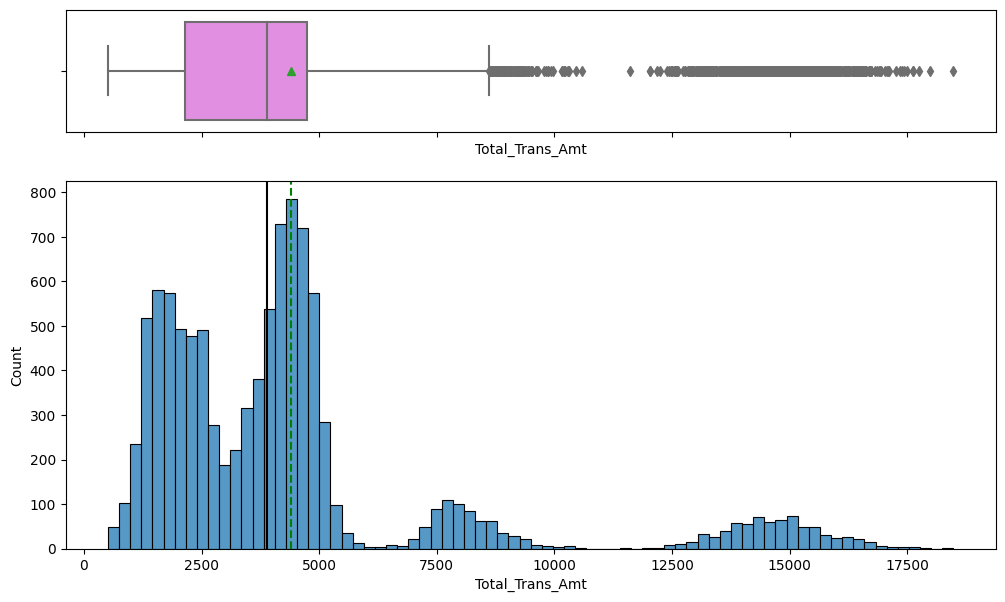

In [ ]:
histogram_boxplot(df, "Total_Trans_Amt")  ## Complete the code to create histogram_boxplot for 'New_Price'

* The distribution of the Total transaction amount is skewed towards the right.* There are many outliers in this variable and the values above $4,700 are being represented as outliers by the boxplot. a total of 2637 rows. 26% of the total records. 296 are attrited customers, 2341 are existing customers

In [ ]:
df[(df["Total_Trans_Amt"] > 4700) & (df["Attrition_Flag"] == "Existing Customer")]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2038,Existing Customer,52,F,3,Doctorate,Single,abc,Blue,36,3,2,1,24703.000,1085,23618.000,0.998,4776,63,0.575,0.044
2544,Existing Customer,50,F,1,Uneducated,Married,Less than $40K,Blue,36,6,2,2,4204.000,499,3705.000,0.635,4740,67,0.523,0.119
2571,Existing Customer,43,F,5,Graduate,Married,Less than $40K,Blue,35,3,6,4,5438.000,2214,3224.000,0.668,5029,75,0.562,0.407
2594,Existing Customer,42,F,3,NaN,Single,Less than $40K,Blue,37,6,1,3,6453.000,0,6453.000,0.760,4822,74,0.609,0.000
2618,Existing Customer,49,F,2,Post-Graduate,Single,abc,Blue,36,3,3,2,24904.000,0,24904.000,0.636,5176,71,0.479,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.000,2241,10946.000,0.689,15354,112,0.931,0.170
10117,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106
10120,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.000,2109,11831.000,0.660,15577,114,0.754,0.151
10121,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.000,606,3082.000,0.570,14596,120,0.791,0.164


`Total_Ct_Chng_Q4_Q1`

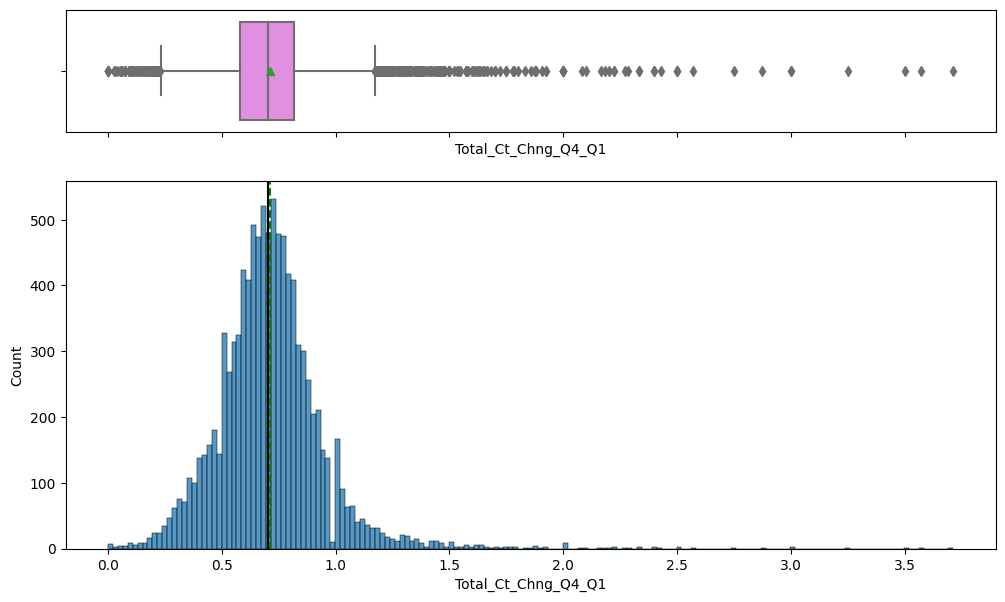

In [ ]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")  ## Complete the code to create histogram_boxplot for 'New_Price'

* The distribution of the Ratio of the total transaction count in 4th quarter and the total transaction amount in 1st quarter is very evenly distributed,with large amount of outliers with ratio that are greater than 1.3 and smaller than 0.2. this pattern is very close to the distribution of the Total_Amt_Chng_Q4_Q1 which is a consistent reflection.


`Avg_Utilization_Ratio`

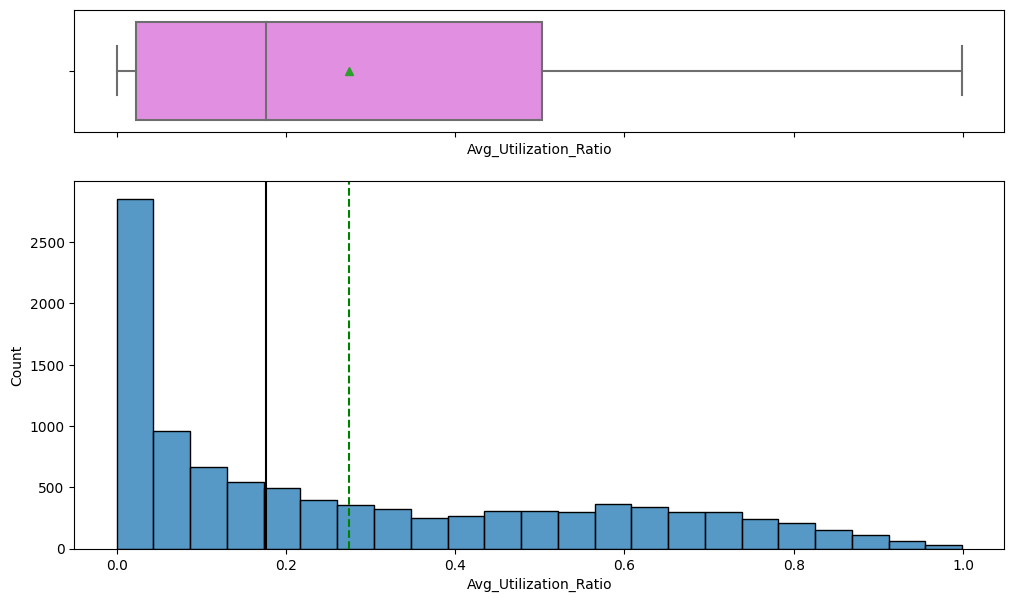

In [ ]:
histogram_boxplot(df, "Avg_Utilization_Ratio")  ## Complete the code to create histogram_boxplot for 'New_Price'

* The distribution of the Average utilization ratio, represents how much of the available credit the customer spent, is skewed towards the right due to majority of the this ratio is zero.

`Dependent_count`

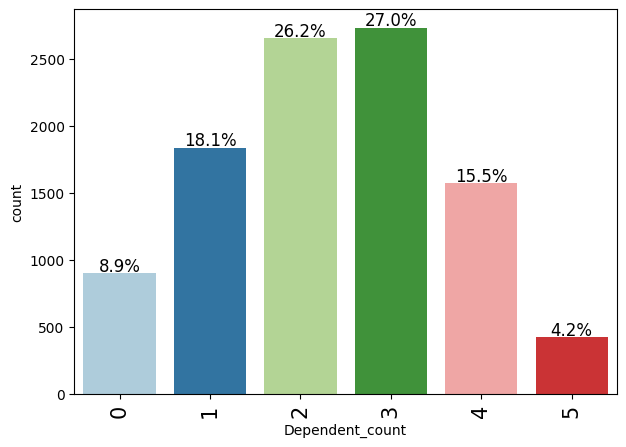

In [ ]:
labeled_barplot(df, "Dependent_count",perc=True)

* Half of the customers base (53%) have either 2 or 3 dependents

`Total_Relationship_Count`

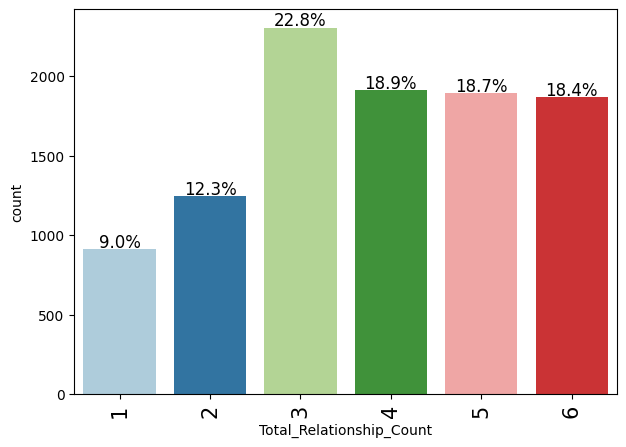

In [ ]:
labeled_barplot(df, "Total_Relationship_Count",perc=True) ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

* 22.8% of the customers have 3 products with the bank followed by customers who have 4 or 5 or products with ~18% respectively out of the total.

`Months_Inactive_12_mon`

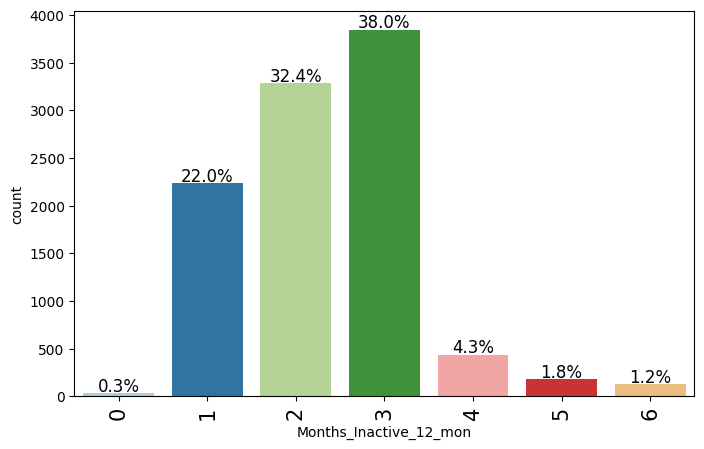

In [ ]:
labeled_barplot(df, "Months_Inactive_12_mon",perc=True) ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

* 38% of the customers are inactive up to 3 months, followed by 32.4% who are inactivies up to 2 months.

`Contacts_Count_12_mon`

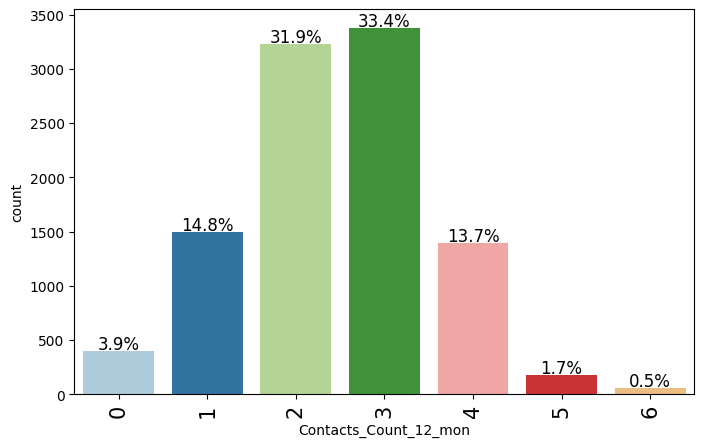

In [ ]:
labeled_barplot(df, "Contacts_Count_12_mon",perc=True) ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'

* 33.4% of the customers contacted the bank 3 times, followed by 31.9% customers contacted the bank 2 times in the last 12 months.

`Gender`

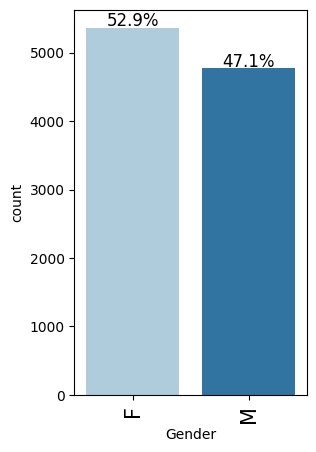

In [ ]:
labeled_barplot(df, "Gender",perc=True) ## Complete the code to create labeled_barplot for 'Gender'

* 52.9% of the customers are female and 47.1% are male.

**Let's see the distribution of the level of education of customers**

`Education_Level`

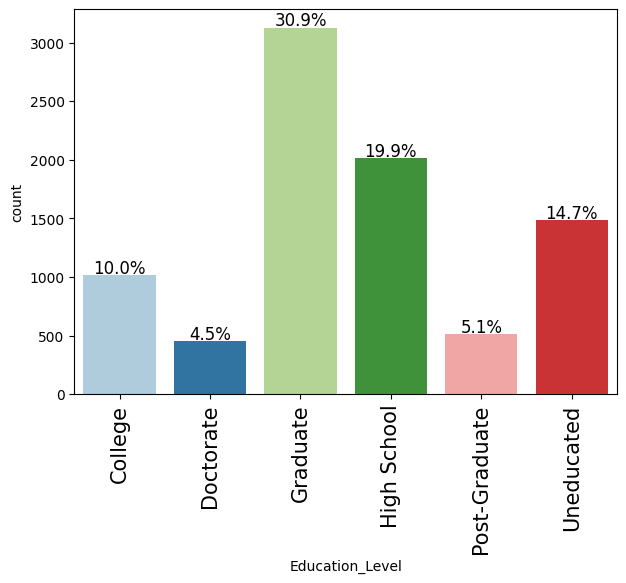

In [ ]:
labeled_barplot(df, "Education_Level",perc=True) ## Complete the code to create labeled_barplot for 'Education_Level'

* 30.9 of the customers have graduate degree followed by 19.9% customers have High school degree.

`Marital_Status`

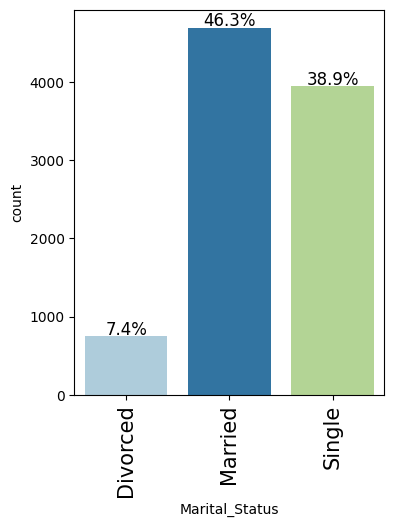

In [ ]:
labeled_barplot(df, "Marital_Status",perc=True) ## Complete the code to create labeled_barplot for 'Marital_Status'

* 46.3% of the customers are married, followed by 38.9% customers are singles and 7.4% are divorced.

**Let's see the distribution of the level of income of customers**

`Income_Category`

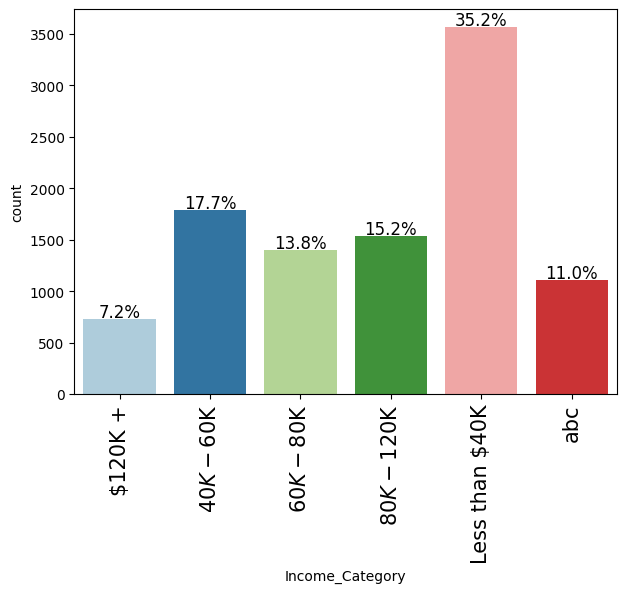

In [ ]:
labeled_barplot(df, "Income_Category",perc=True) ## Complete the code to create labeled_barplot for 'Income_Category'

* 35.2% of customers have income less than $40K followed by customers who have income between 40K-60K.
* There is 11% that have analymous data in the dataset which will be cleaned up

`Card_Category`

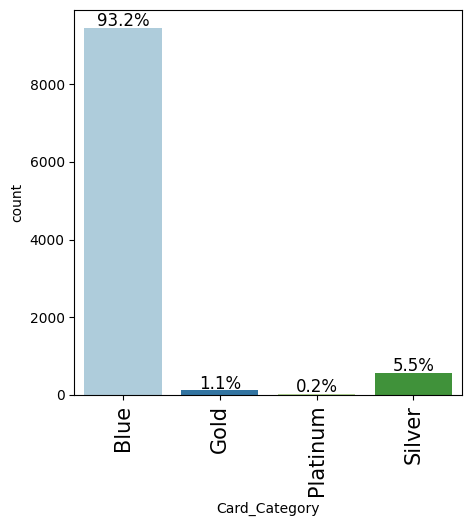

In [ ]:
labeled_barplot(df, "Card_Category",perc=True) ## Complete the code to create labeled_barplot for 'Card_Category'

* 93.2% of the customers have Blue type of credit card followed by 5.5% of Silver card.

`Attrition_Flag`

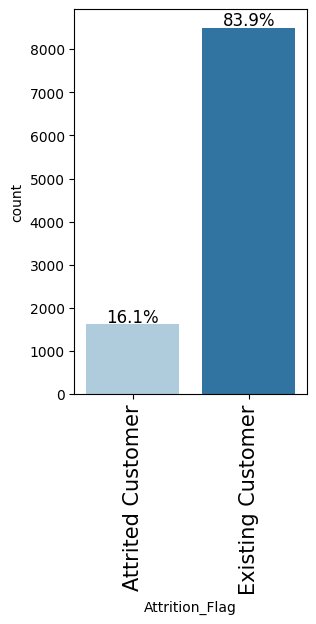

In [ ]:
labeled_barplot(df, "Attrition_Flag",perc=True) ## Complete the code to create labeled_barplot for 'Attrition_Flag'

* 83.9% are existing customer where 16.1% are attrited customers

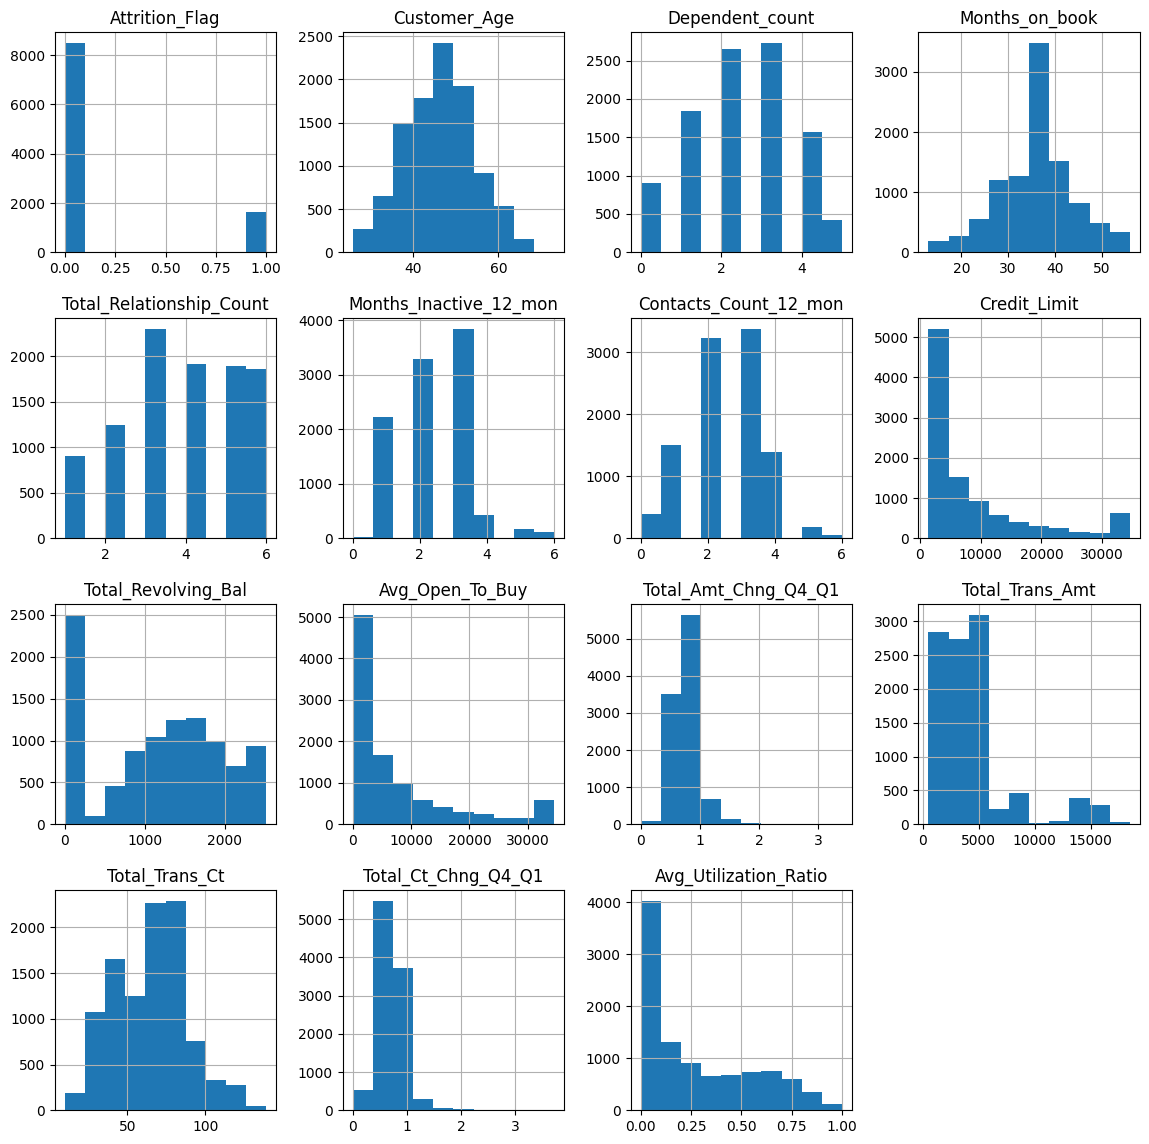

In [ ]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

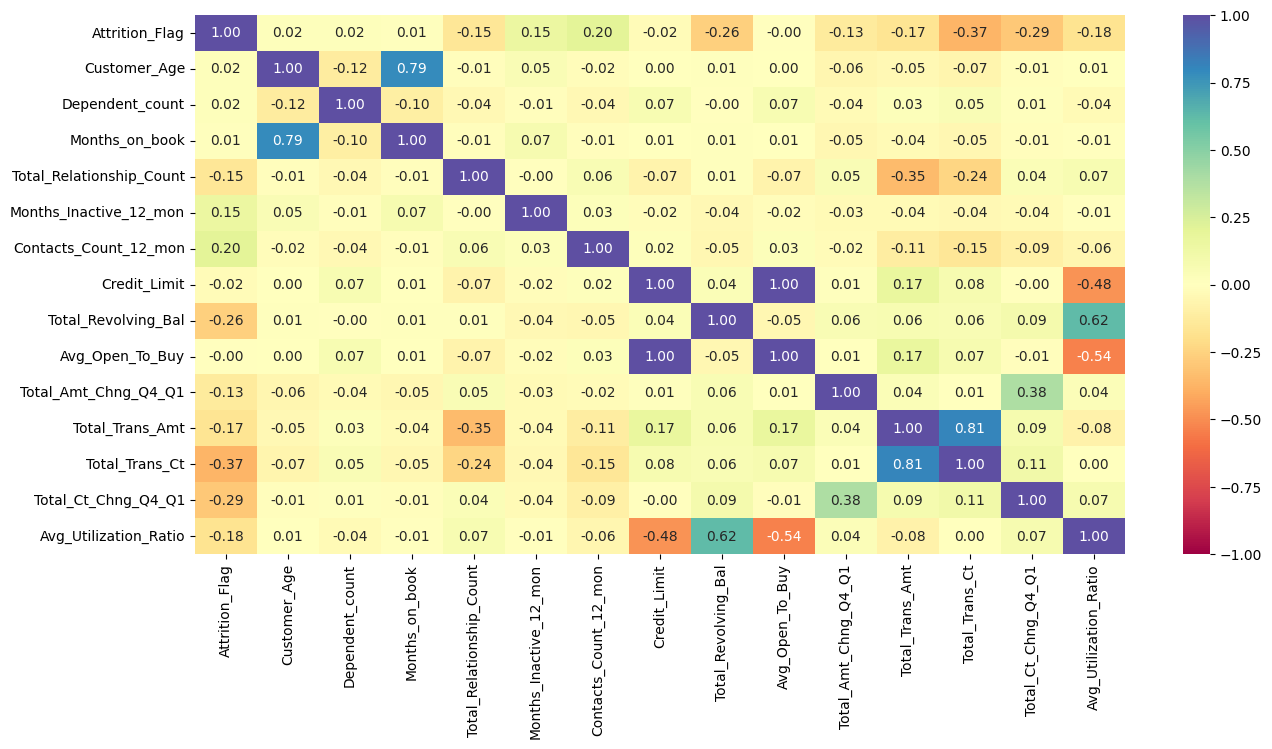

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Total Transaction counts have the strongest correlation with Total Transaction amount (0.81), indicates as total transaction counts go up, total transaction amount also go up.
* Customer's age has high positive correlation with the period of time the customer has relationship with the bank (0.79), this indicates as age goes up, the longer the customers have the relationship with the bank.
* Total revolving balance is also positively correlated (0.62) to Average utilization ratio. As customer spend more on the the amount left on the credit card each month, the revolving balance increase when they do not pay the balance in full.
* Total_Ct_Chng_Q4_Q1 is also positively correlated (0.38) to the Total_Amt_Chng_Q4_Q1, as the ratio goes up on the total count, so does the ratio of the total amount.
* Based on the Reatlion bteween Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio: ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1. The correlation matrix reflected accordingly, Avg_Open_To_Buy is negatively correlated to Avg_Utilization_Ratio (-0.54), the Avg_Utilization_Ratio represents how much of the available credit the customer spent, if this ratio goes up, the Avg_Open_To_Buy, the amount left on the credit card to use goes down.
* Avg_Open_To_Buy is strongly positively correlated to Credit_Limit (1.00)since customer can only spend on what is available with their credit limit.

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


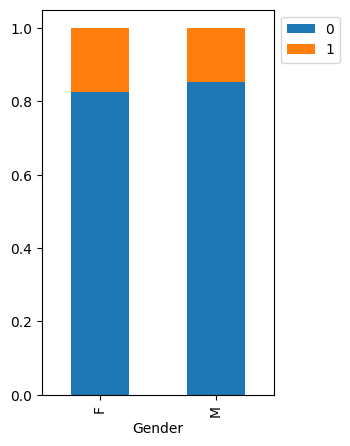

In [ ]:
stacked_barplot(df, "Gender", "Attrition_Flag")

* There are more Female attrited customers than Male attrited customers

`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


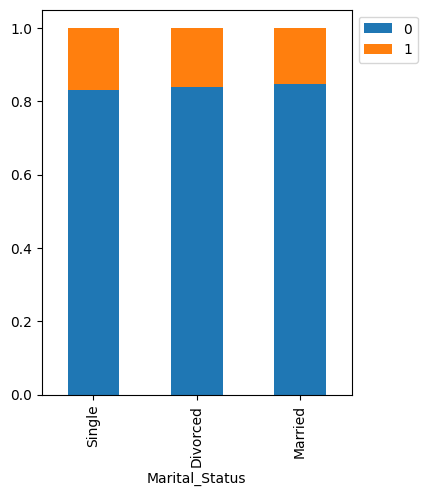

In [ ]:
stacked_barplot(df,"Marital_Status", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

* The ratio of attrited customers in the three marital status are closed to the same, marital status does not seem to have an impact on the target variable.

`Attrition_Flag vs Education_Level`

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


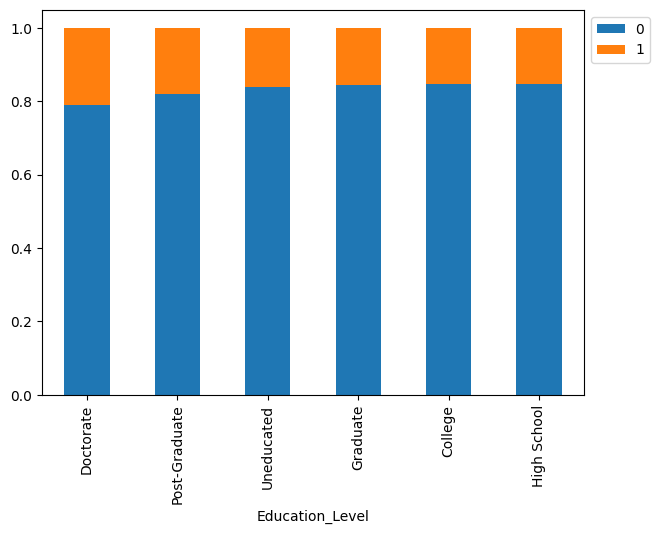

In [ ]:
stacked_barplot(df,"Education_Level", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

* Within the customers population who have Doctrate degree, it consists the most attrited customers (~21%).
* ~16% of the customers in all different type of education level are attrited customers.

`Attrition_Flag vs Income_Category`

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


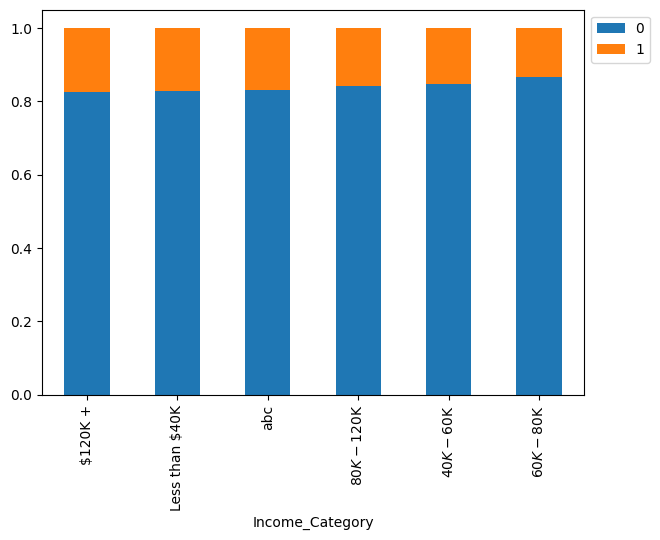

In [ ]:
stacked_barplot(df,"Income_Category", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

* There are ~17% of attrited customers for most of the income category except for the 60K-80K which is ~13%.

`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


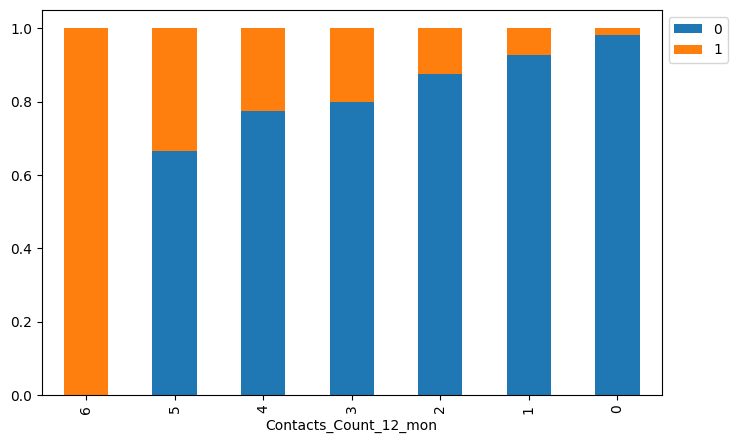

In [ ]:
stacked_barplot(df,"Contacts_Count_12_mon", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

* For the customers who have contacted the bank 6 times in the last 12 months, they are 100% attrited customers, followed by the customers who contacted 5 times, ~34% are attrited customers.
* It seems the higher the number of times the customers contacted the bank could be one of the reason the customers become attrited, we should investigate further.

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


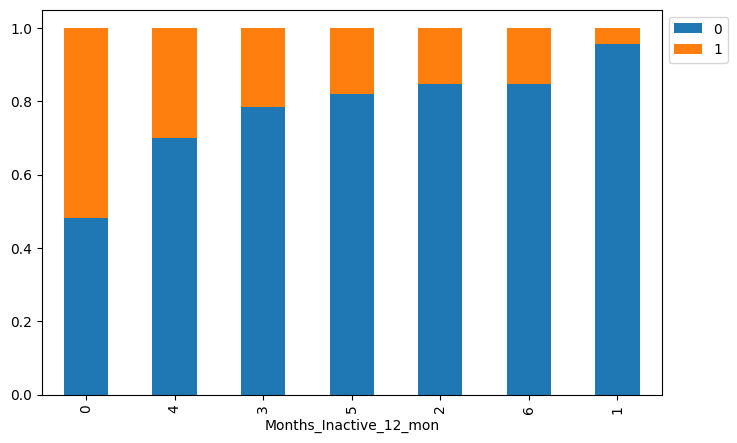

In [ ]:
stacked_barplot(df,"Months_Inactive_12_mon", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

* There are overall 16% attrited customers out of the total who are have been inactive up to 6 months.
* With the customers who are the least inactive (1 month) also consist of the least number of attrited customers.

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


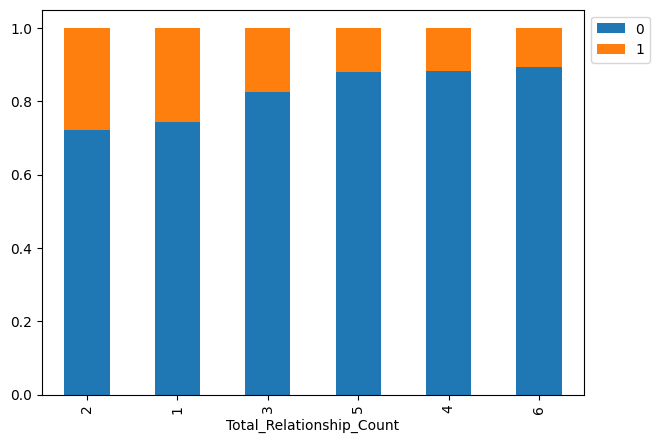

In [ ]:
stacked_barplot(df,"Total_Relationship_Count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

* Customers who have 4 to 6 products with the bank has the least number of attrited customers, where the customers who have 1 or 2 products have the most number of attrited customers.

`Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


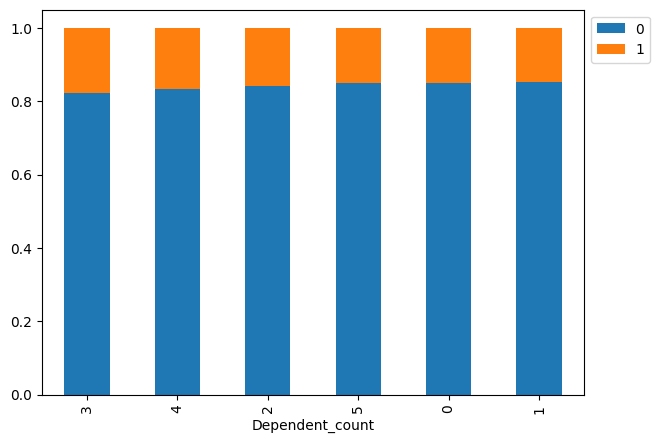

In [ ]:
stacked_barplot(df,"Dependent_count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

* There are ~17% of attrited customers across all dependent count category.
* The ratio of attrited customers in the Dependent count category are closed to the same, marital status does not seem to have an impact on the target variable.


`Total_Revolving_Bal` vs `Attrition_Flag`

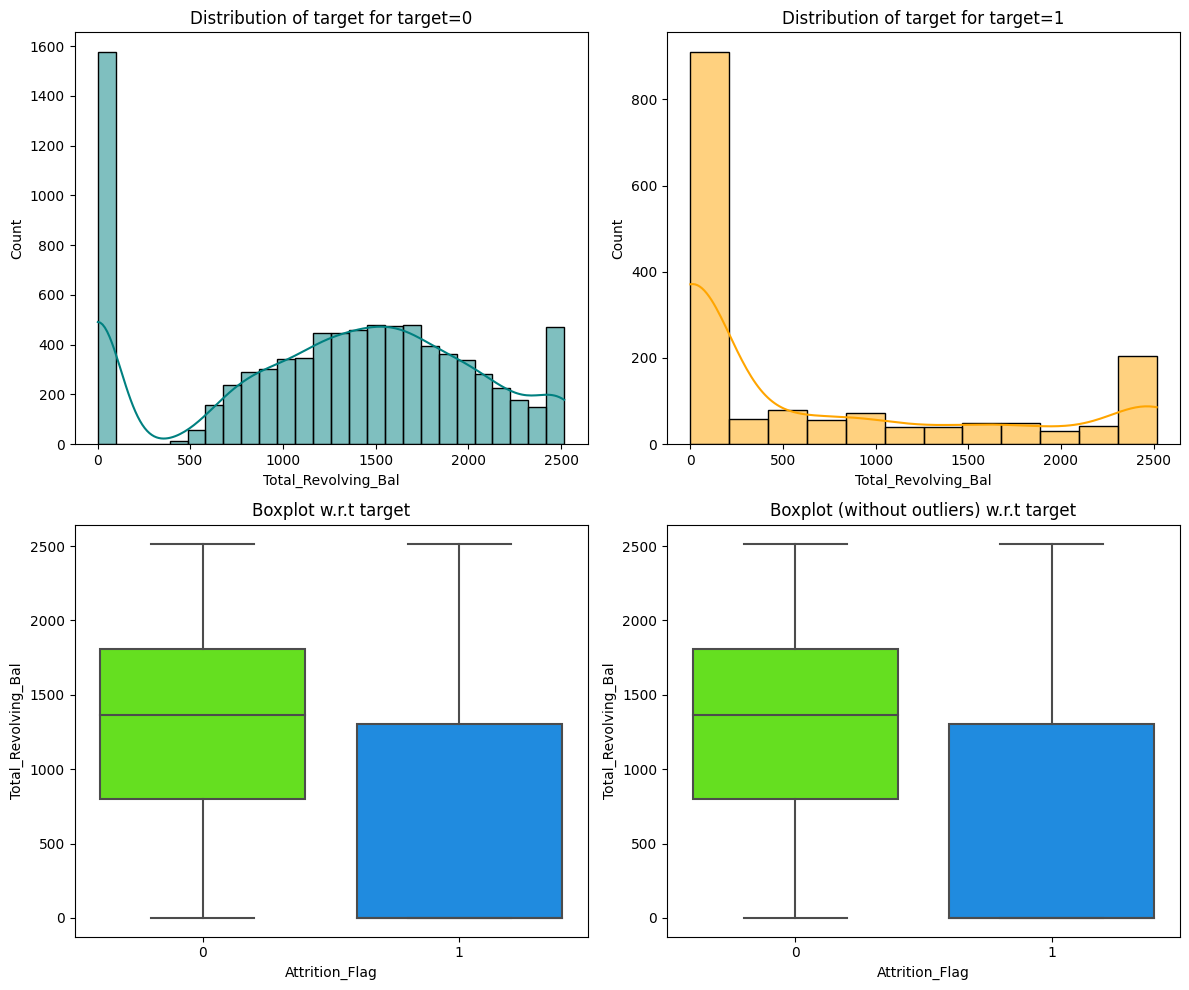

In [ ]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

* The distribution of the Total_Revolving_Bal is extremely skewed to the right for the group of customers, mainly due to the high number of customers who does not carry any revolving balance to next month which skewed the entire data population.
* majority of the attrited customers do not have a revolving balance and carry a lot lower balance compared to the existing customers.


`Attrition_Flag vs Credit_Limit`

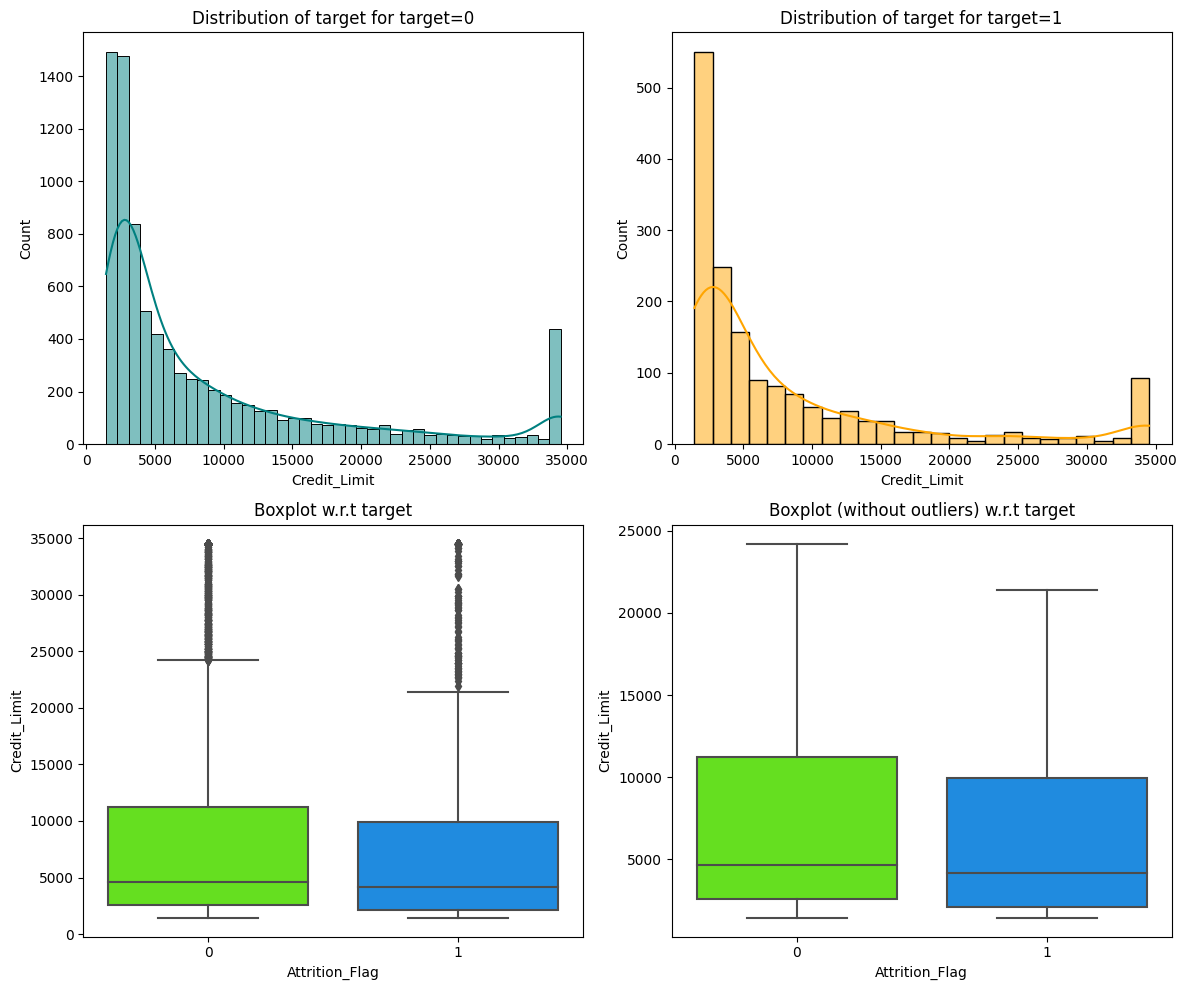

In [ ]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

* The distribution of the credit is extremely skewed to the right for the group of existing customers and the attrited customers.
* The distribution and the total amount of the credit limit are similar between the existing customers and the attrited customers indicates credit limit does not have much impact on the target variable.
* the boxplot that was executed without the outliers shows more dispersed which indicates that it reduced some statistical significance and distort the result slightly

`Attrition_Flag vs Customer_Age`

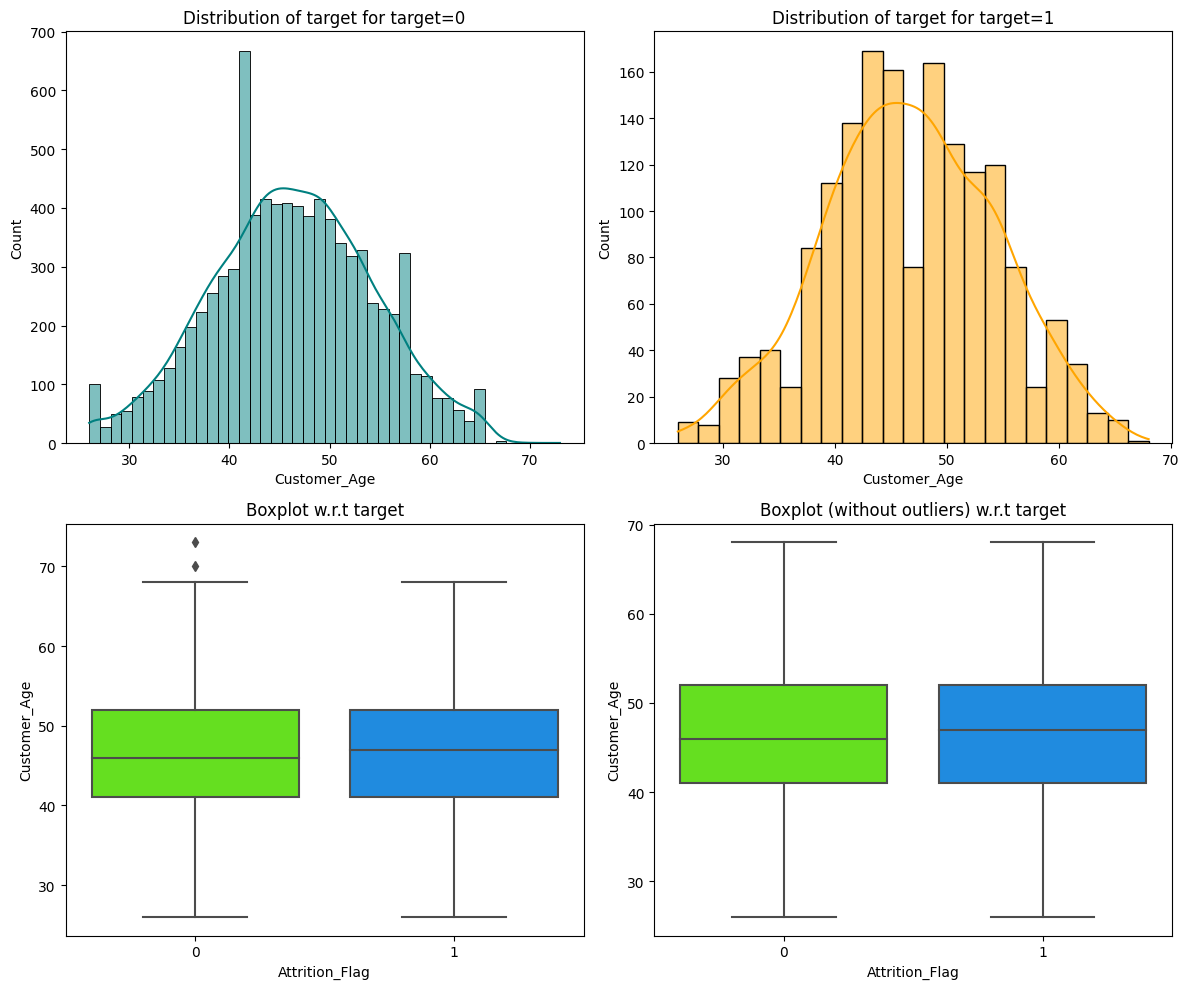

In [ ]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

* The distribution of the customer Age has very normal distribution between the existing customers and the attrited customers. There is not much difference in how data is dispersed between the two groups.

`Total_Trans_Ct` vs `Attrition_Flag`

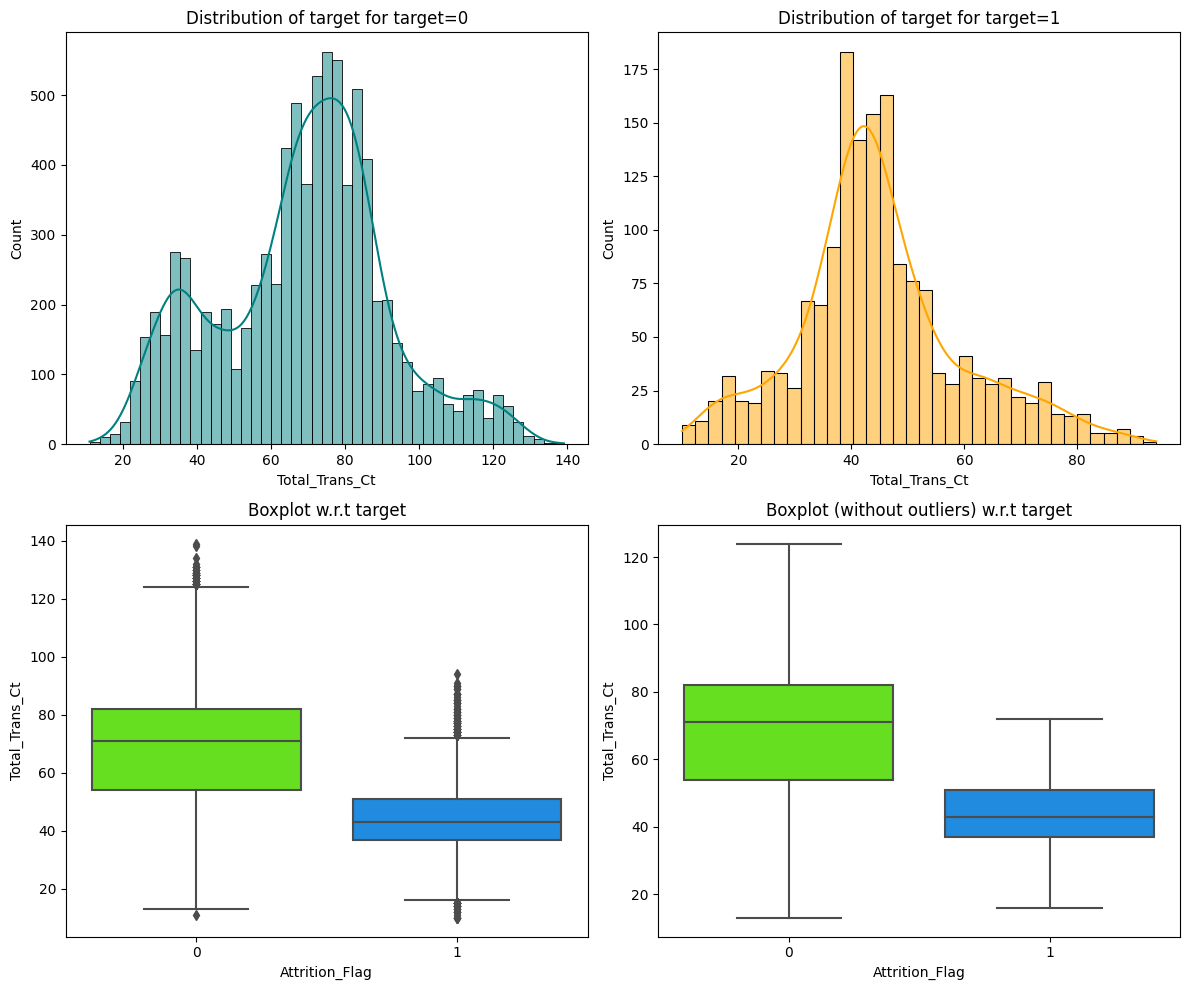

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

* There's a significant difference in the total transaction counts between the existing customers and the attrited customers.
* Attrited customers have much lower total transaction counts with average between 30 to 50 vs 58 to 82 for the existing customers.

`Total_Trans_Amt` vs `Attrition_Flag`

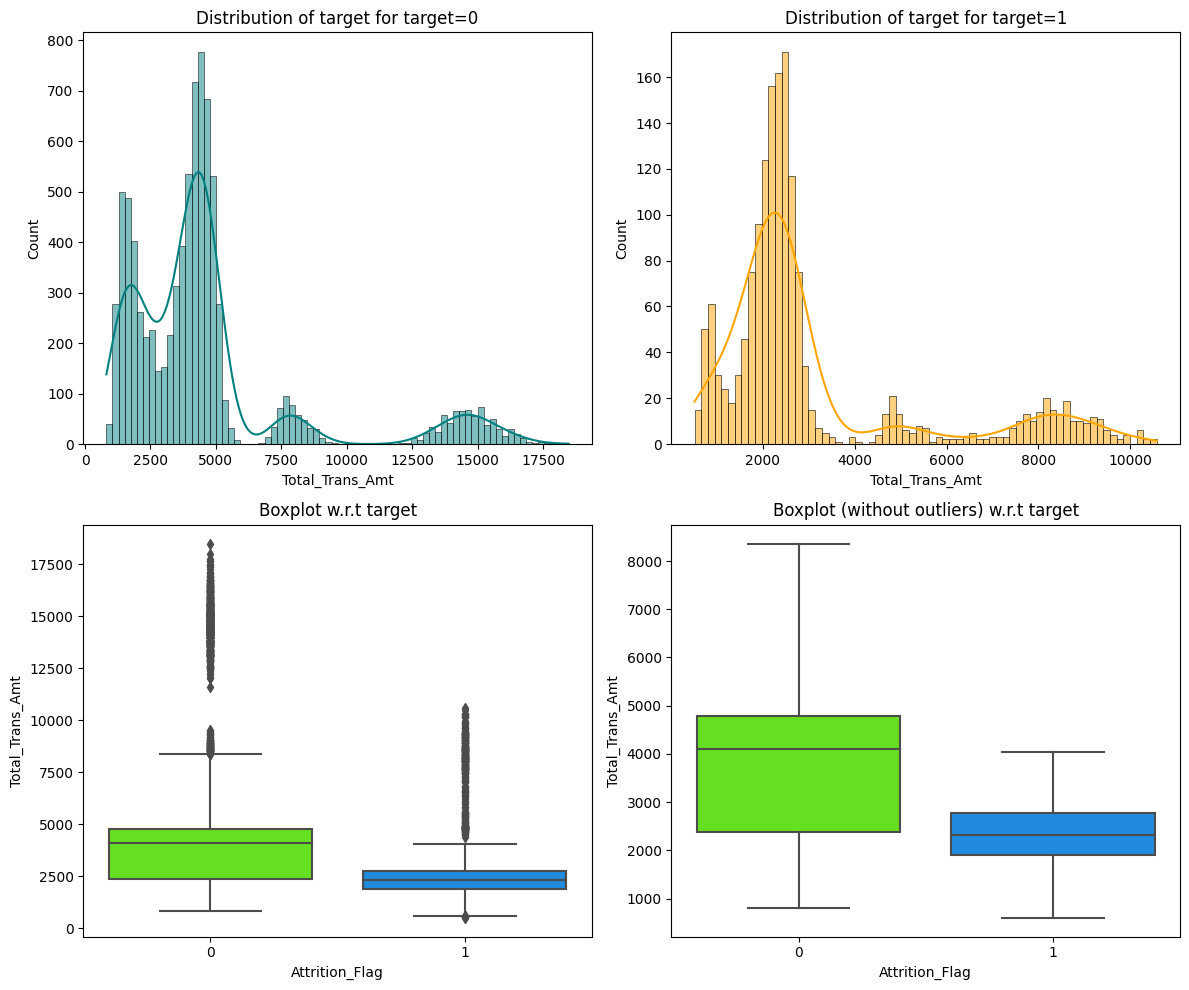

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

* There's a similar difference in the total transaction amount between the existing customers and the attrited customers.
Attrited customers have much lower total transaction amount with average between 1800 to 2800 vs 2500 to 4800 for the existing customers.

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

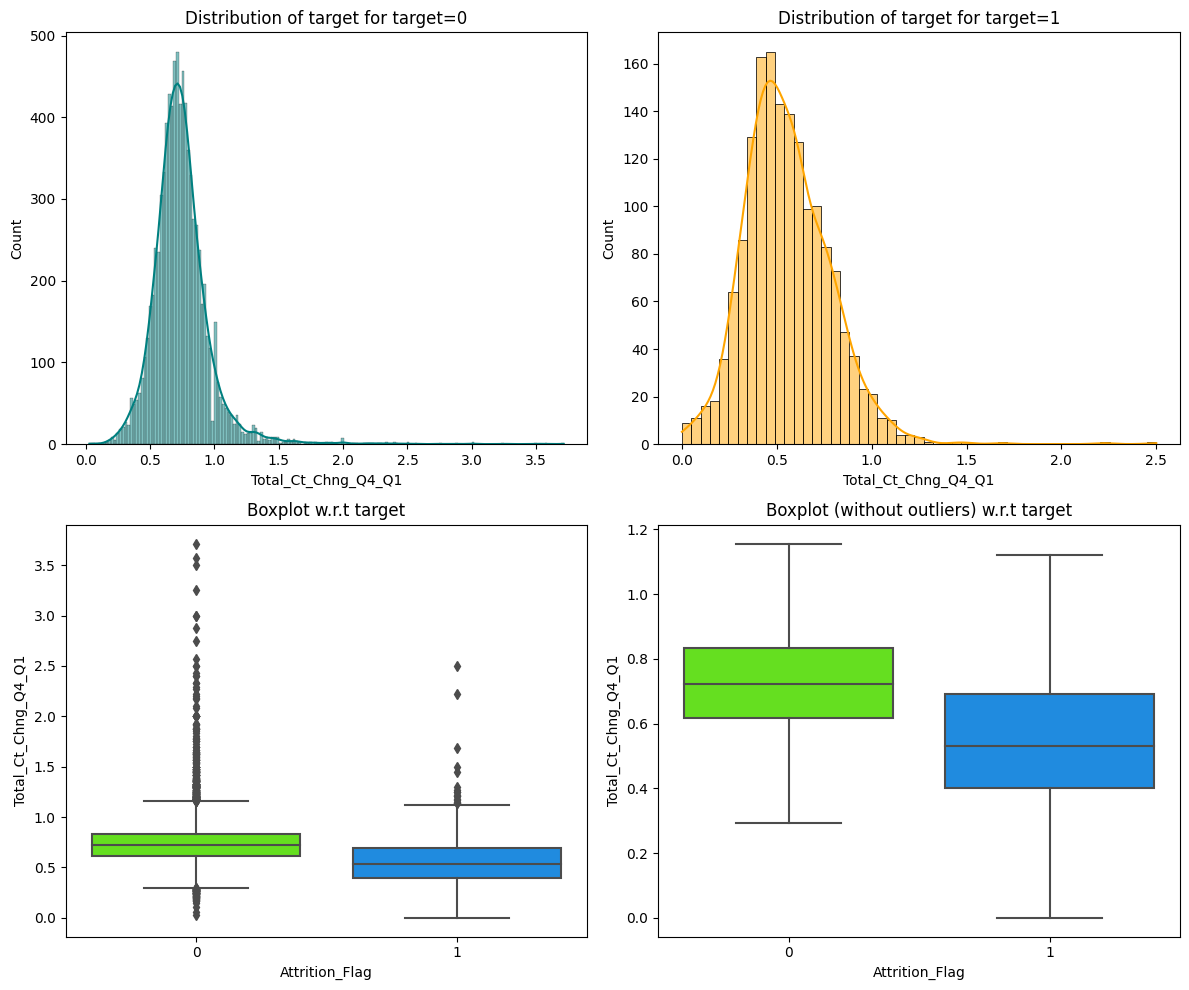

In [ ]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

* The distribution of Total_Ct_Chng_Q4_Q1 is quite normal between the existing customers and the attrited customers.
* The ratio is lower with the attrited customers although the range is bigger as compared to the existing customers.

`Avg_Utilization_Ratio` vs `Attrition_Flag`

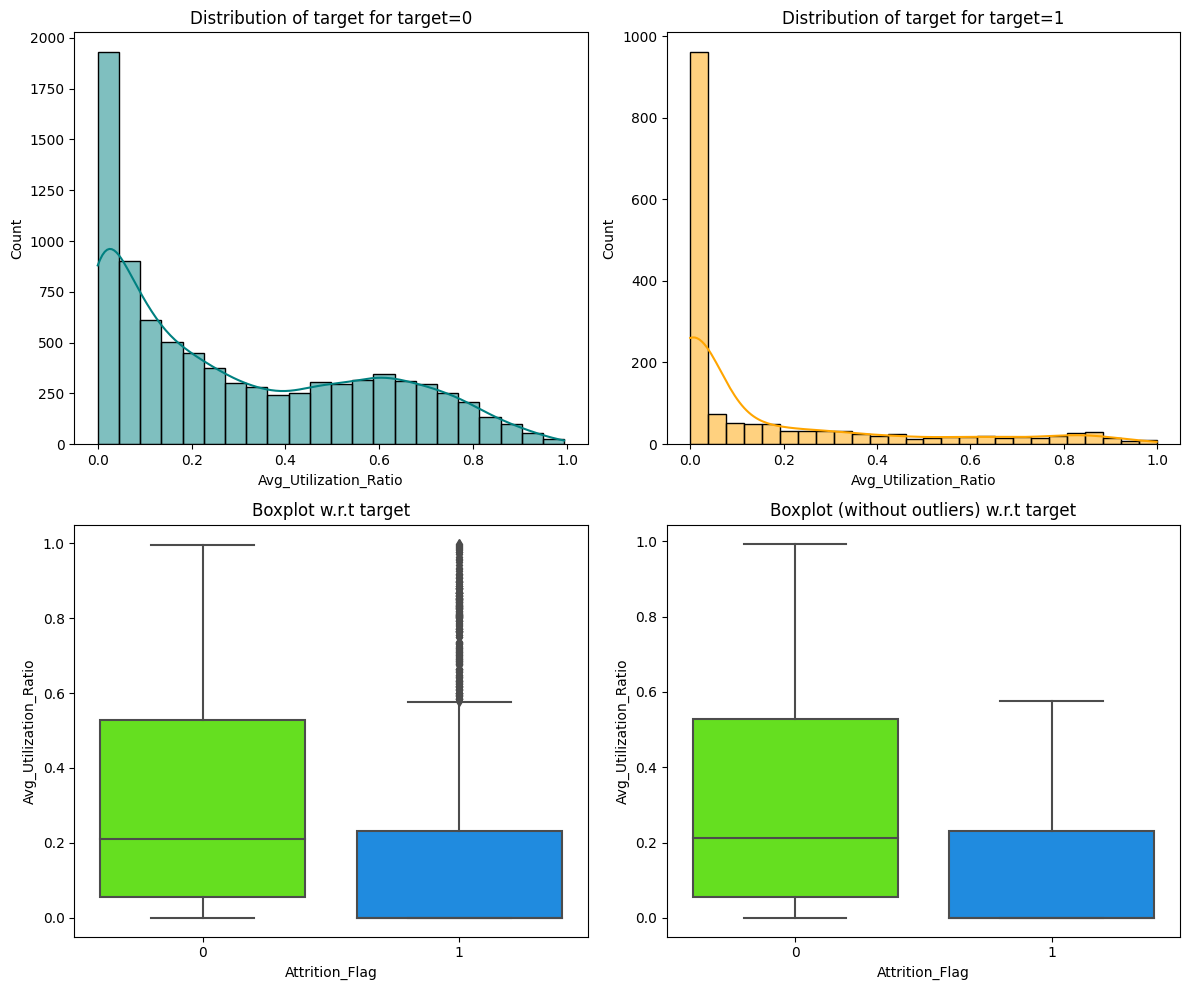

In [ ]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag

* The distribution of the Avg_Utilization_Ratio is extremely skewed to the right for the attrited customer, mainly due to the high number of customers who does not have any credit card utilization which skewed the entire data population.
* There is much higer Avg_Utilization_Ratio with the existing customers than the attrited customers.




`Attrition_Flag vs Months_on_book`

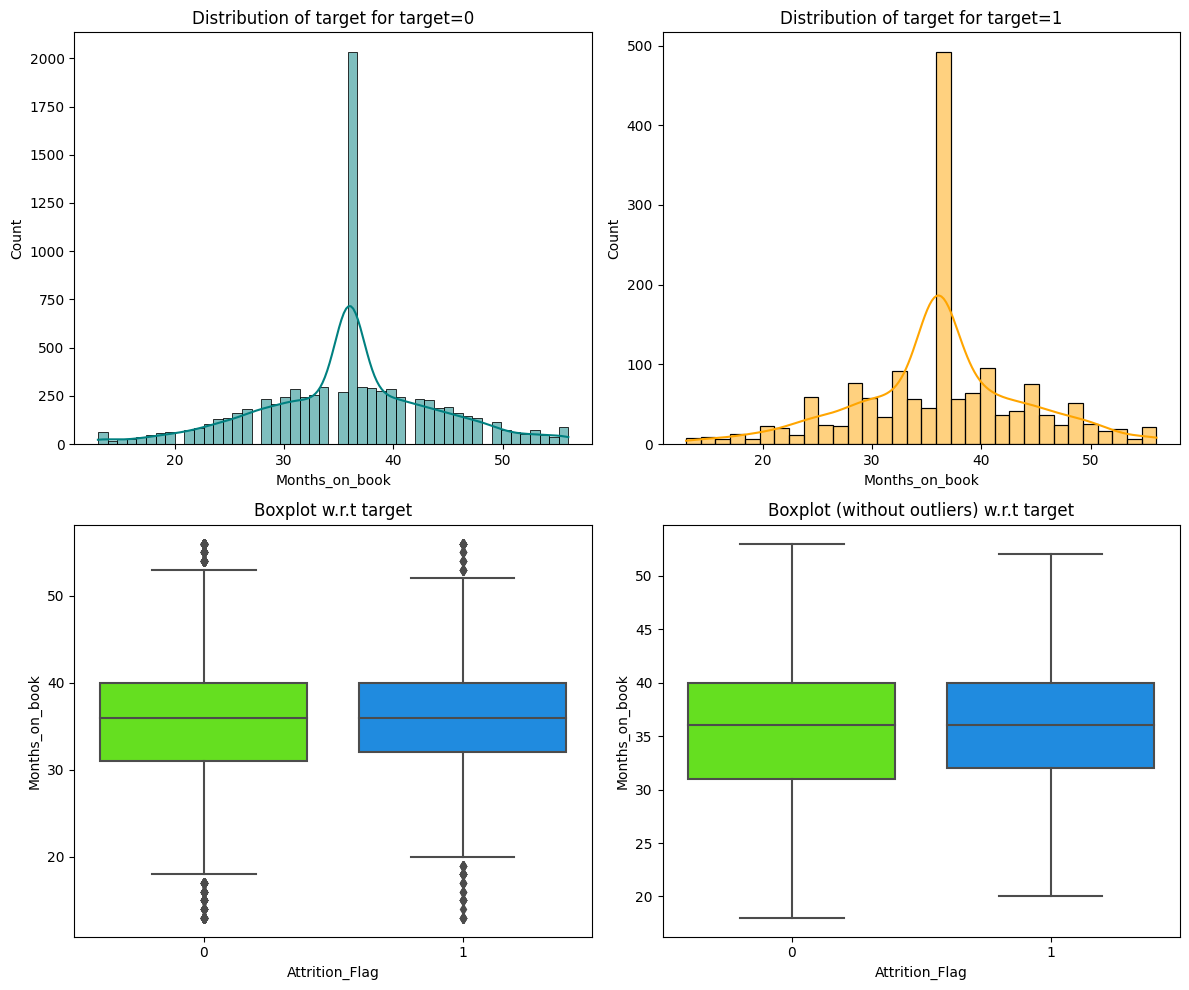

In [ ]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

* 50% of the customers for both existing and attrited have almost the same number of months of relationship with the bank, between 28 to 40 months.

`Attrition_Flag vs Total_Revolving_Bal`

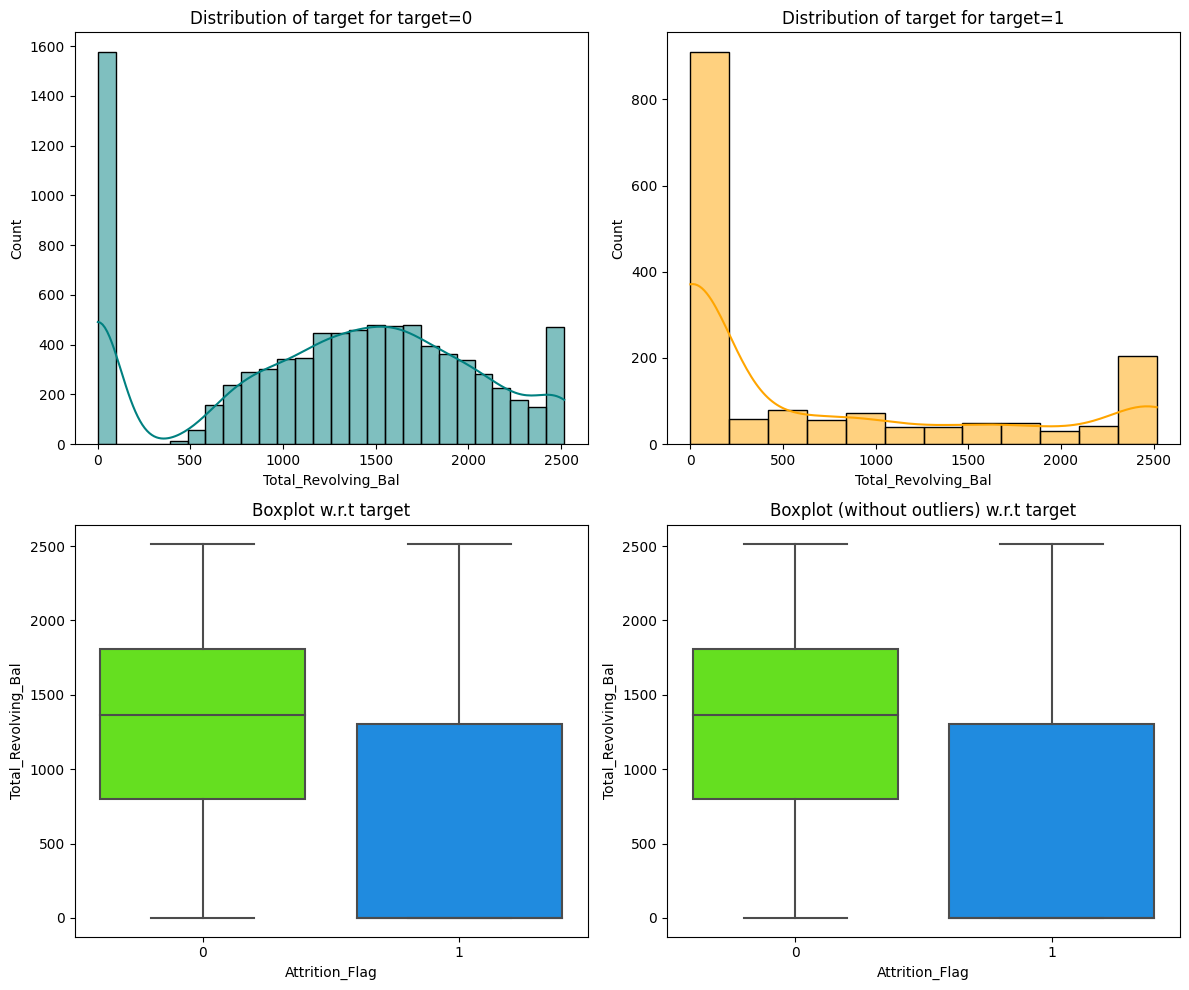

In [ ]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

* The distribution of the total revolving balance is skewed to the right for both group of customers, mainly due to the high number of customers who does not have any credit card utilization which skewed the entire data population.
* The total revolving balance for the attrited customers is much lower than the existing with 60% range from 0 to 1200 dollars.
* The total revolving balance for the existing customers is higher with 50% range from 800 to 1800 dollars.

`Attrition_Flag vs Avg_Open_To_Buy`

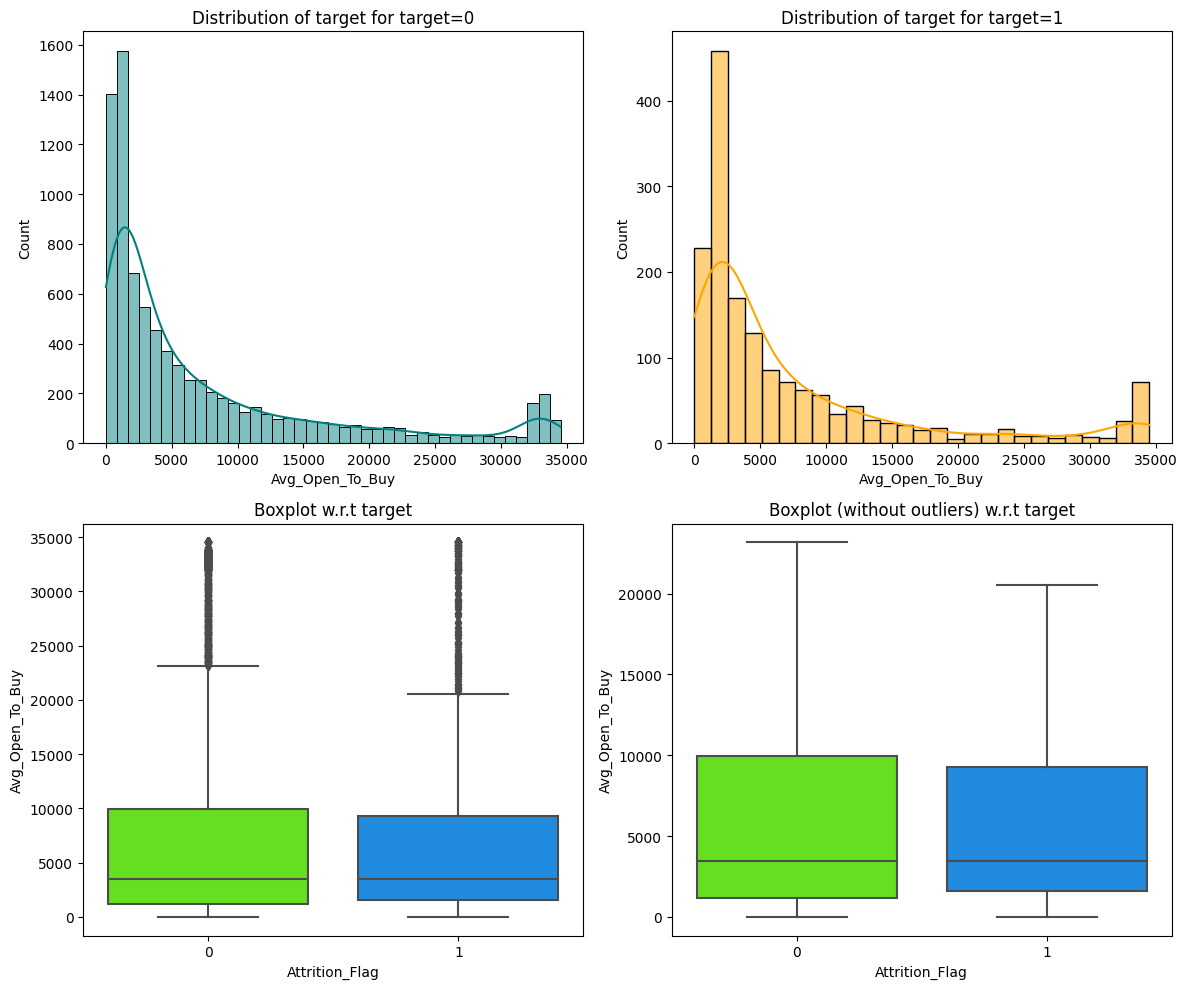

In [ ]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

* The distribution of the Average Open to buy is almost the same between the attrited customers and the existing customers, and is very right skewed.

## Data Preprocessing

### Outlier Detection

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

### Train-Test Split

In [ ]:
# creating the copy of the dataframe
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace("abc", np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

In [ ]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
data1.shape

(10127, 20)

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) ## Complete the code to split the data into train test in the ratio 80:20
# Sarah added to test
print("Training and Testing data split-->")
print(X_train.shape, X_temp.shape, y_train.shape, y_temp.shape)



Training and Testing data split-->
(8101, 19) (2026, 19) (8101,) (2026,)


In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp) ## Complete the code to split the data into train test in the ratio 75:25

#Sarah added
print("Testing and validation data split-->")
print(X_test.shape, X_val.shape, y_test.shape, y_val.shape)
print("Final data split of Training, Validation and Testing dataset-->")
print(X_train.shape, X_val.shape, X_test.shape)

Testing and validation data split-->
(1519, 19) (507, 19) (1519,) (507,)
Final data split of Training, Validation and Testing dataset-->
(8101, 19) (507, 19) (1519, 19)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 8101
Number of rows in validation data = 507
Number of rows in test data = 1519


### Missing value imputation

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.transform(X_val[reqd_col_for_impute]) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute]) ## Complete the code to impute missing values in X_test

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4288
M    3813
Name: Gender, dtype: int64
******************************
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: Education_Level, dtype: int64
******************************
Married     4376
Single      3139
Divorced     586
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: Income_Category, dtype: int64
******************************
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    260
M    247
Name: Gender, dtype: int64
******************************
Graduate         246
High School       85
Uneducated        73
College           56
Post-Graduate     27
Doctorate         20
Name: Education_Level, dtype: int64
******************************
Married     292
Single      185
Divorced     30
Name: Marital_Status, dtype: int64
******************************
Less than $40K    228
$40K - $60K       100
$60K - $80K        75
$80K - $120K       75
$120K +            29
Name: Income_Category, dtype: int64
******************************
Blue        468
Silver       30
Gold          8
Platinum      1
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4288
M    3813
Name: Gender, dtype: int64
******************************
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: Education_Level, dtype: int64
******************************
Married     4376
Single      3139
Divorced     586
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: Income_Category, dtype: int64
******************************
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: Card_Category, dtype: int64
******************************


### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)  ## Complete the code to impute missing values in X_val
X_test = pd.get_dummies(X_test, drop_first=True)  ## Complete the code to impute missing values in X_val
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (507, 29) (1519, 29)


* After encoding there are 29 columns.

In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
3105,53,2,37,5,3,4,7282.000,0,7282.000,0.740,3364,69,0.816,0.000,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
3721,44,4,37,4,3,3,5826.000,0,5826.000,0.689,3756,73,0.921,0.000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3389,50,3,41,4,2,2,2563.000,1860,703.000,0.680,3774,83,0.804,0.726,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3552,50,1,30,6,2,3,9771.000,1776,7995.000,0.460,2778,53,0.472,0.182,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
398,55,0,49,5,3,3,3805.000,2233,1572.000,1.095,1743,27,0.929,0.587,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9838709677419355
Random forest: 1.0
GBM: 0.8840245775729647
Adaboost: 0.84715821812596
dtree: 1.0

Validation Performance:

Bagging: 0.8148148148148148
Random forest: 0.7530864197530864
GBM: 0.9012345679012346
Adaboost: 0.8641975308641975
dtree: 0.8024691358024691


In [ ]:
# added by Sarah
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9839, Validation Score: 0.8148, Difference: 0.1691
Random forest: Training Score: 1.0000, Validation Score: 0.7531, Difference: 0.2469
GBM: Training Score: 0.8840, Validation Score: 0.9012, Difference: -0.0172
Adaboost: Training Score: 0.8472, Validation Score: 0.8642, Difference: -0.0170
dtree: Training Score: 1.0000, Validation Score: 0.8025, Difference: 0.1975


### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 29)
After Oversampling, the shape of train_y: (13598,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9986762759229298
Random forest: 1.0
GBM: 0.9810266215619944
Adaboost: 0.9670539785262539
dtree: 1.0

Validation Performance:

Bagging: 0.8765432098765432
Random forest: 0.8888888888888888
GBM: 0.9382716049382716
Adaboost: 0.8888888888888888
dtree: 0.8024691358024691


In [ ]:
# Added by Sarah
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9987, Validation Score: 0.8765, Difference: 0.1221
Random forest: Training Score: 1.0000, Validation Score: 0.8889, Difference: 0.1111
GBM: Training Score: 0.9810, Validation Score: 0.9383, Difference: 0.0428
Adaboost: Training Score: 0.9671, Validation Score: 0.8889, Difference: 0.0782
dtree: Training Score: 1.0000, Validation Score: 0.8025, Difference: 0.1975


### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9946236559139785
Random forest: 1.0
GBM: 0.9823348694316436
Adaboost: 0.9516129032258065
dtree: 1.0

Validation Performance:

Bagging: 0.9382716049382716
Random forest: 0.9506172839506173
GBM: 0.9382716049382716
Adaboost: 0.9506172839506173
dtree: 0.9135802469135802


In [ ]:
# Added by Sarah
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9946, Validation Score: 0.9383, Difference: 0.0564
Random forest: Training Score: 1.0000, Validation Score: 0.9506, Difference: 0.0494
GBM: Training Score: 0.9823, Validation Score: 0.9383, Difference: 0.0441
Adaboost: Training Score: 0.9516, Validation Score: 0.9506, Difference: 0.0010
dtree: Training Score: 1.0000, Validation Score: 0.9136, Difference: 0.0864


### Hyperparameter Tuning

#### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



### Tuning AdaBoostClassifier model with Undersampled data instead of original data

> Indented block



In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.954692012967875:
CPU times: user 2.73 s, sys: 319 ms, total: 3.04 s
Wall time: 1min 42s


In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=1,
    n_estimators= 90, learning_rate= 0.2, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada2.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [ ]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_ada2, X_train_un, y_train_un) ## Complete the code to check the performance on training set
adb2_train

,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.998,0.999


In [ ]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_ada2, X_val, y_val) ## Complete the code to check the performance on validation set
adb2_val

,Accuracy,Recall,Precision,F1
0,0.947,0.951,0.770,0.851


#### Tuning Gradient Boosting using Undersampled data

> Indented block



In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9523902151488359:
CPU times: user 2.82 s, sys: 316 ms, total: 3.13 s
Wall time: 1min 51s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.2,
    n_estimators=125,
    subsample=0.7,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train_un, y_train_un) ## Complete the code to check the performance on oversampled train set
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.996,0.998,0.994,0.996


In [ ]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val) ## Complete the code to check the performance on validation set
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.955,0.975,0.790,0.873


 #### Tuning Gradient Boosting using Oversampled data instead of original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9519108990174436:
CPU times: user 9.46 s, sys: 1.02 s, total: 10.5 s
Wall time: 7min 9s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.2,
    n_estimators=100,
    subsample=0.7,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5, random_state=1,
                           subsample=0.7)

In [ ]:
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)## Complete the code to check the performance on oversampled train set
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.985,0.987,0.983,0.985


In [ ]:
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val) ## Complete the code to check the performance on validation set
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.984,0.963,0.940,0.951


#### Tuning XGBoost Model with Original data
**Optional**

You can choose not to build XGBoost if you are facing issues with installation or taking more time to execute.



In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9515974064249928:
CPU times: user 3.5 s, sys: 293 ms, total: 3.79 s
Wall time: 1min 15s


In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train) ## Complete the code to check the performance on original train set
xgb_train

,Accuracy,Recall,Precision,F1
0,0.938,0.998,0.724,0.839


In [ ]:
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val) ## Complete the code to check the performance on validation set
xgb_val

,Accuracy,Recall,Precision,F1
0,0.925,0.963,0.690,0.804


## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb2_train.T,
        xgb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "XBBoost trained with orginal data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data,XBBoost trained with orginal data
Accuracy,0.996,0.985,0.999,0.938
Recall,0.998,0.987,1.000,0.998
Precision,0.994,0.983,0.998,0.724
F1,0.996,0.985,0.999,0.839


In [ ]:
# validation performance comparison

## Write the code to compare the performance on validation set
models_train_comp_df = pd.concat([ gbm1_val.T, gbm2_val.T, adb2_val.T,xgb_val.T,], axis=1,)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "XBBoost trained with orginal data"
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data,XBBoost trained with orginal data
Accuracy,0.955,0.984,0.947,0.925
Recall,0.975,0.963,0.951,0.963
Precision,0.790,0.940,0.770,0.690
F1,0.873,0.951,0.851,0.804


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
 ## Write the code to check the performance of best model on test data
gbm1_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_test

,Accuracy,Recall,Precision,F1
0,0.949,0.975,0.768,0.859


In [ ]:
l

### Feature Importances

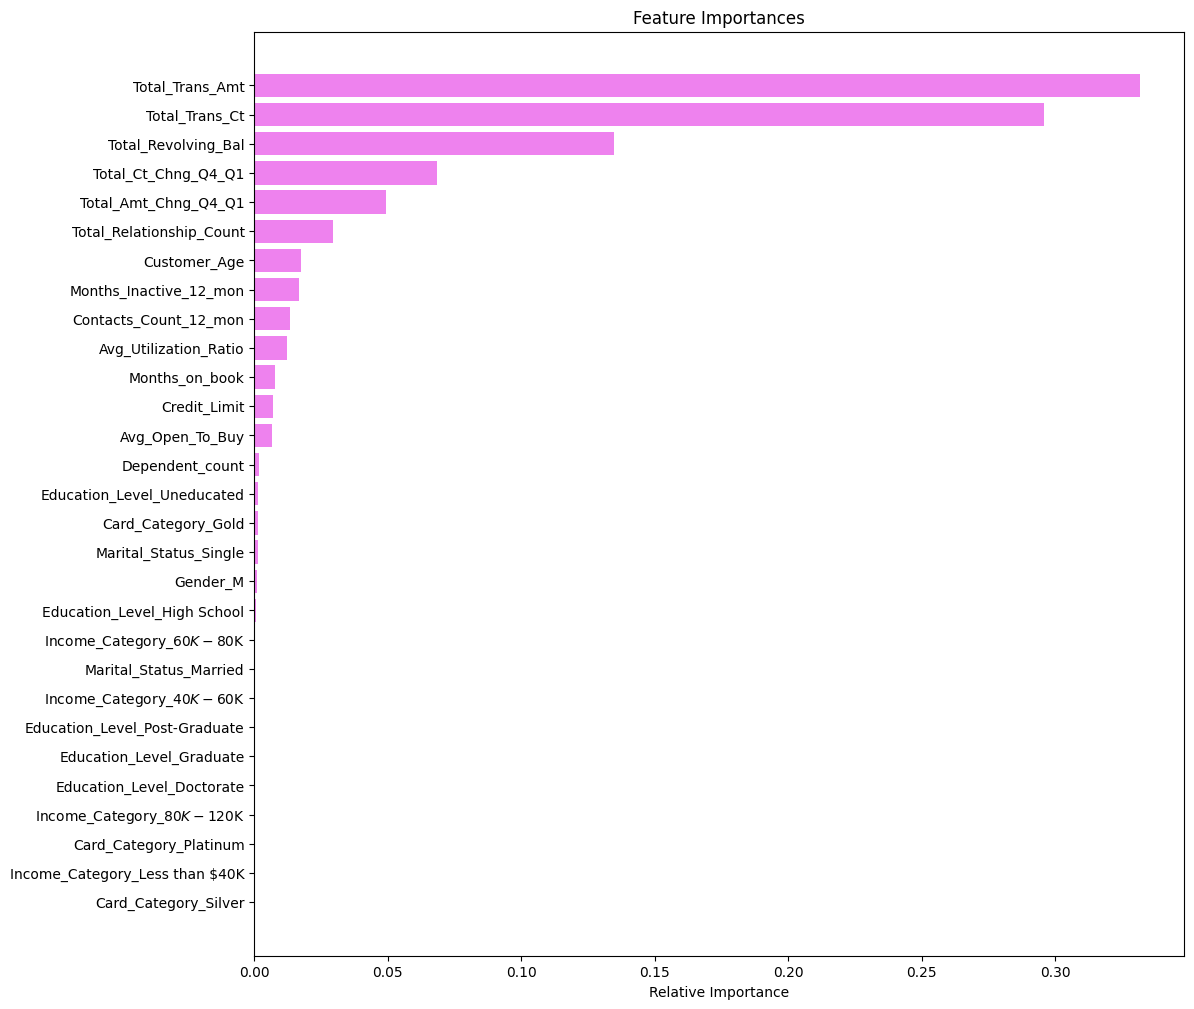

In [ ]:
feature_names = X_train.columns
importances =  tuned_gbm1.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

-


***